# PROYECTO FINAL PORTAFOLIOS

El objetivo del examen final es construir un portafolio riesgoso con 7 acciones e invertir en un
portafolio completo que maximice tu utilidad. Considera una tasa libre de riesgo de 5.0%, un premio
por riesgo de mercado de 10.0% y un nivel de aversión al riesgo A=3.


Para las 7 acciones seleccionadas, calcula: 

#### 1. Rendimiento esperado diario y anual bajo los siguientes modelos:

#### a. Modelo de rendimiento promedio constante 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.optimize as optimize
from scipy.stats import norm
import math
pd.core.common.is_list_like = pd.api.types.is_list_like

In [2]:
"""Se buscan los datos y se muestran las 7 acciones atrabajar """

ipc_path = "../Tarea/ipc.xlsx" 
market = pd.read_excel(ipc_path, index_col=0)
market.columns = [c.replace(" MF Equity", "").replace(" INDEX", "").replace("*", "") for c in market.columns]
portafolio_i = market[['KIMBERA', 'FEMSAUBD','TLEVICPO','LABB','KOFUBL','ASURB','OMAB', 'MEXBOL']]
portafolio_i = portafolio_i.pct_change(1)
portafolio_i.dropna(axis=0,inplace=True)

portafolio_i

,KIMBERA,FEMSAUBD,TLEVICPO,LABB,KOFUBL,ASURB,OMAB,MEXBOL
DATE,,,,,,,,
2016-01-04,-0.029973,-0.024810,-0.018232,0.040433,-0.029136,-0.022961,-0.022007,-0.020099
2016-01-05,-0.006895,0.001142,-0.007882,-0.044414,-0.012220,-0.022074,-0.002324,-0.001710
2016-01-06,0.006171,-0.009062,-0.016106,-0.008715,0.012624,-0.004549,0.005516,-0.008337
2016-01-07,0.000767,-0.007866,-0.001991,-0.029304,-0.000997,-0.005432,-0.013288,-0.024696
2016-01-08,-0.013023,-0.016308,0.015183,-0.015094,-0.012729,-0.004118,-0.016185,-0.009744
...,...,...,...,...,...,...,...,...
2019-12-30,-0.006964,0.002012,-0.012944,-0.032292,-0.001738,-0.005868,-0.016583,-0.013647
2019-12-31,-0.025974,-0.003347,0.003165,0.006997,0.000000,-0.000056,0.004889,-0.002668
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Se calcula el modelo de rendimiento contante para cada acción

In [3]:
Rendimuent_dia = portafolio_i.mean()
Rendimuent_anio = portafolio_i.mean() * 252
Varianza_dia = portafolio_i.var()
Varianza_anio = portafolio_i.var() * 255
Desviación_día = portafolio_i.std()
Desviación_anio =portafolio_i.std() * 252
Matriz_rendimientos = pd.DataFrame([Rendimuent_dia,Rendimuent_anio,Varianza_dia,Varianza_anio,Desviación_día,Desviación_anio ],index=('Rendimiento Diario', 'Rendimiento Anual', 'Varianza Diaria', 'Varianza Anual', 'Desviación Estandar Diaria', "Desviación Estandar Anual"))
Matriz_rendimientos.drop('MEXBOL',axis=1,inplace=True)
Matriz_rendimientos

,KIMBERA,FEMSAUBD,TLEVICPO,LABB,KOFUBL,ASURB,OMAB
Rendimiento Diario,0.000066,0.000185,-0.000547,0.000521,0.000016,0.000490,0.000631
Rendimiento Anual,0.016722,0.046561,-0.137916,0.131383,0.004156,0.123539,0.158900
Varianza Diaria,0.000245,0.000128,0.000313,0.000463,0.000152,0.000224,0.000253
Varianza Anual,0.062491,0.032732,0.079691,0.118057,0.038728,0.057067,0.064419
Desviación Estandar Diaria,0.015655,0.011330,0.017678,0.021517,0.012324,0.014960,0.015894
Desviación Estandar Anual,3.944935,2.855054,4.454871,5.422206,3.105588,3.769828,4.005330


#### b. Modelo CAPM 

In [4]:
y = portafolio_i['MEXBOL']
X = portafolio_i.drop('MEXBOL',axis=1,inplace=False) #SIN MEXBOL
X1 = sm.add_constant(X)
model = sm.OLS(y, X1)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 MEXBOL   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     289.8
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          5.36e-239
Time:                        21:19:35   Log-Likelihood:                 4077.3
No. Observations:                1045   AIC:                            -8139.
Df Residuals:                    1037   BIC:                            -8099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.209e-05      0.000     -0.408      0.6

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Se muestra la beta de cada acción y se clasifican  en defensivas o agresivas

In [5]:
Betas = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0]
Betas.drop(['std err','t','P>|t|','[0.025','0.975]'],axis=1,inplace=True)
Betas.drop(['const'],axis=0,inplace=True)
Betas.columns = ['Beta']
    
def categorizar(fila):
    Beta = fila.Beta
    if Beta > 1:
        return "Riesgoso"
    
    else :
        return "No riesgoso"

Betas["Categoría"] = Betas.apply(categorizar, axis=1)    
Betas

,Beta,Categoría
KIMBERA,0.1128,No riesgoso
FEMSAUBD,0.2388,No riesgoso
TLEVICPO,0.1032,No riesgoso
LABB,0.0484,No riesgoso
KOFUBL,0.0942,No riesgoso
ASURB,0.1039,No riesgoso
OMAB,0.0963,No riesgoso


### 2. Matriz varianza-covarianza 

In [6]:
covarianza = X.cov()
#covarianza.drop('MEXBOL',axis=1,inplace=True)
covarianza

,KIMBERA,FEMSAUBD,TLEVICPO,LABB,KOFUBL,ASURB,OMAB
KIMBERA,0.000245,0.000038,0.000027,0.000070,0.000048,0.000048,0.000057
FEMSAUBD,0.000038,0.000128,0.000039,0.000029,0.000066,0.000045,0.000049
TLEVICPO,0.000027,0.000039,0.000313,0.000043,0.000049,0.000064,0.000041
LABB,0.000070,0.000029,0.000043,0.000463,0.000029,0.000048,0.000038
KOFUBL,0.000048,0.000066,0.000049,0.000029,0.000152,0.000052,0.000048
ASURB,0.000048,0.000045,0.000064,0.000048,0.000052,0.000224,0.000119
OMAB,0.000057,0.000049,0.000041,0.000038,0.000048,0.000119,0.000253


### Utilizando los rendimientos esperados bajo el modelo CAPM, construye:
### 3. Frontera de carteras de mínima varianza y frontera eficiente / graficar 

In [7]:
#Creamos matriz de pesos para cada acción
pesos_i = []
cont = len(X.columns)


for i in range(cont):
    pesos_i.append(1/cont)

w = np.array(pesos_i)
print("Pesos iniciales: ", w)


Pesos iniciales:  [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]


In [8]:
r = np.array(np.mean(X))
C = np.cov(X.transpose())

In [9]:
def mu(w,r):
    '''Rendimiento portafolio anualizado'''
    return sum(w * r * 252) 


def sigma(w, C):
    '''Desv STD portadolio anualizada'''
    return np.sqrt(np.dot(w.T,np.dot(C * 252, w)))
    #np.dot(w,np.dot(C,w.T)) ** (1/2) * 252 ** (1/2)

    
def sharpe(w):
    '''Sharpe ratio con rf de 5%'''
    rf = .05
    return (mu(w,r) - rf) / sigma(w,C)


def neg_sharpe(w):
    '''Sharpe ratio negativo'''
    return -sharpe(w)




In [10]:
print("Coeficiente de Sharpe con pesos iniciales: ", round(sharpe(w),3))

Coeficiente de Sharpe con pesos iniciales:  -0.007


#### Frontera de carteras de mínima varianza y frontera eficiente / graficar

#### a. Con ventas en corto
#### b. Sin ventas en corto

In [11]:

def apply_sum_constraint(inputs):
    total = 1- np.sum(inputs)
    return total

my_constraints = ({'type': 'eq', "fun": apply_sum_constraint })


#Con ventas en corto Sin restricción de x

con_venta = optimize.minimize(neg_sharpe, 
                      w, 
                      method='SLSQP', 
                      bounds=((-1.0, 1.0), (-1.0, 1.0), (-1.0, 1.0),(-1.0, 1.0),(-1.0, 1.0),(-1.0, 1.0),(-1.0, 1.0)),
                      options={'disp': True},
                      constraints=my_constraints)

#Sin ventas en corto con restricción de x>=0

sin_venta = optimize.minimize(neg_sharpe, 
                      w, 
                      method='SLSQP', 
                      bounds=((0, 1.0), (0, 1.0), (0, 1.0),(0, 1.0),(0, 1.0),(0, 1.0),(0, 1.0)),
                      options={'disp': True},
                      constraints=my_constraints)

#print(con_venta)
#print(sin_venta)

optimal_w_con = con_venta["x"]
optimal_w_sin = sin_venta["x"]

print("Pesos optimos con ventas en corto sin restricción de x: ",optimal_w_con)
print("Pesos optimos sin ventas en corto con restricción de x>=0: ",optimal_w_sin)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.9141583892894736
            Iterations: 12
            Function evaluations: 108
            Gradient evaluations: 12
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.48025435085361345
            Iterations: 6
            Function evaluations: 54
            Gradient evaluations: 6
Pesos optimos con ventas en corto sin restricción de x:  [-0.32410485  0.52410349 -1.          0.5286197  -0.52415384  0.79553549
  1.        ]
Pesos optimos sin ventas en corto con restricción de x>=0:  [1.85225035e-17 0.00000000e+00 2.41634307e-16 2.24254530e-01
 5.11054795e-17 1.78882558e-01 5.96862912e-01]


In [12]:
def random_ports(n):
    '''Portafolio aleatorios'''
    means, stds = [],[]
    for i in range(n):
        rand_w = np.random.rand(len(X.columns))
        rand_w = rand_w / sum(rand_w)
        means.append(mu(rand_w, r))
        stds.append(sigma(rand_w,C))
    
    return means, stds

Text(0, 0.5, 'mean')

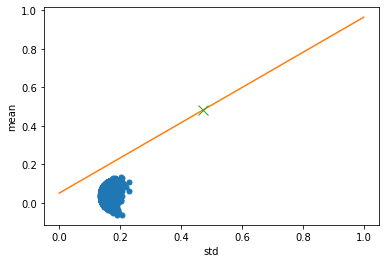

In [13]:
#Grafiquemos
n_portfolios = 100000
means, stds = random_ports(n_portfolios)


from pylab import * 
x = arange(1.5)

best_mu = mu(optimal_w_con, r)
best_sigma = sigma(optimal_w_con, C)
best_sharpe = sharpe(optimal_w_con)
plt.plot(stds, means, 'o', markersize=5)
plt.plot(0.05 + ((best_mu-0.05)/best_sigma)*x) 
plt.plot(best_sigma, best_mu, 'x',  markersize=10)
#plt.plot(0.05 + 0.1*best_sigma,'--',  markersize=2) 
#plt.plot(0.05 + 0.1*Betas['Beta'][0], '-',markersize=10) 
plt.xlabel('std')
plt.ylabel('mean')

### 4. Encuentra el portafolio riesgoso óptimo (maximiza el coeficiente de Sharpe) 

In [14]:
print("El coeficiente de Sharpe maximizado es: ", round(sharpe(optimal_w_sin),3))
print("El portafolio optimo es : ",  best_sigma, best_mu)


El coeficiente de Sharpe maximizado es:  0.48
El portafolio optimo es :  0.47185878989076496 0.48135367133862184


### 5. Calcula el VaR paramétrico del portafolio riesgoso óptimo (1 día, 95% de confianza)

In [15]:
from scipy.stats import norm
monto_inv=10_000_000
n_confianza=0.95
F= norm.ppf(n_confianza)
F

1.6448536269514722

In [16]:
Betas['Pesos optimizados']=optimal_w_sin
VaR = Betas.drop(['Beta', 'Categoría'],axis=1,inplace=False) 

VaR['Vector posiciones']=VaR['Pesos optimizados']*monto_inv

v_d=[]
for i in range(len(C)):
    v_d.append(math.sqrt(covarianza[covarianza.index.values[i]][covarianza.index.values[i]]))
 

VaR['Volatilidad Diaria'] = v_d
VaR['VaR individual diaria'] = VaR['Volatilidad Diaria']*VaR['Vector posiciones']*F

VaR

,Pesos optimizados,Vector posiciones,Volatilidad Diaria,VaR individual diaria
KIMBERA,1.852250e-17,1.852250e-10,0.015655,4.769427e-12
FEMSAUBD,0.000000e+00,0.000000e+00,0.011330,0.000000e+00
TLEVICPO,2.416343e-16,2.416343e-09,0.017678,7.026200e-11
LABB,2.242545e-01,2.242545e+06,0.021517,7.936773e+04
KOFUBL,5.110548e-17,5.110548e-10,0.012324,1.035948e-11
ASURB,1.788826e-01,1.788826e+06,0.014960,4.401657e+04
OMAB,5.968629e-01,5.968629e+06,0.015894,1.560413e+05


In [17]:
VaR_T= VaR['VaR individual diaria'].sum()
print("El VaR total diaria es: ", VaR_T)

El VaR total diaria es:  279425.60832992126
